# ドル円レート 週足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00+00:00,117.503998,119.389000,117.467003,119.208000,0,0.0,0.0
2022-03-21 00:00:00+00:00,119.261002,122.349998,119.099998,122.070000,0,0.0,0.0
2022-03-28 00:00:00+01:00,122.269997,125.055000,121.291000,122.402000,0,0.0,0.0
2022-04-04 00:00:00+01:00,122.610001,124.650002,122.288002,124.285004,0,0.0,0.0
2022-04-11 00:00:00+01:00,124.385002,126.670998,124.302002,126.410004,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00+00:00,151.845993,154.792007,151.578995,152.330002,0,0.0,0.0
2025-02-17 00:00:00+00:00,152.022995,152.298004,149.130005,149.229996,0,0.0,0.0
2025-02-24 00:00:00+00:00,149.386993,150.964996,148.595993,150.613998,0,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-09 00:00:00+00:00,107.930000,107.930000,107.930000,107.930000,0,0.0,0.0
2020-03-16 00:00:00+00:00,106.579002,111.336998,105.147003,110.990997,0,0.0,0.0
2020-03-23 00:00:00+00:00,110.403999,111.667999,107.884003,107.910004,0,0.0,0.0
2020-03-30 00:00:00+01:00,107.439003,108.711998,107.028999,108.400002,0,0.0,0.0
2020-04-06 00:00:00+01:00,108.679001,109.352997,108.329002,108.365997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00+00:00,151.845993,154.792007,151.578995,152.330002,0,0.0,0.0
2025-02-17 00:00:00+00:00,152.022995,152.298004,149.130005,149.229996,0,0.0,0.0
2025-02-24 00:00:00+00:00,149.386993,150.964996,148.595993,150.613998,0,0.0,0.0


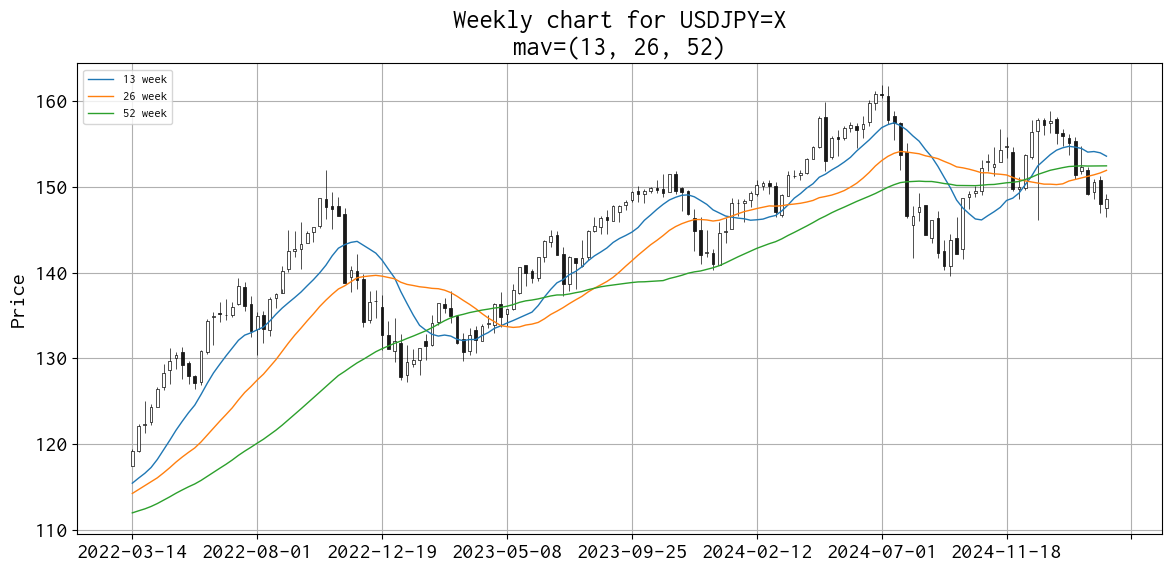

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ma13 = df0['Close'].rolling(13).mean()
ma26 = df0['Close'].rolling(26).mean()
ma52 = df0['Close'].rolling(52).mean()
apds  = [
    mpf.make_addplot(ma13[df.index], width=1, label='13 week', ax=ax),
    mpf.make_addplot(ma26[df.index], width=1, label='26 week', ax=ax),
    mpf.make_addplot(ma52[df.index], width=1, label='52 week', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%Y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.legend(loc='upper left', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [4]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-10 00:00:00+00:00,147.608002,149.186005,146.546997,148.610001,0,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00+00:00    148.029999
2025-03-10 00:00:00+00:00    148.610001
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00+00:00         NaN
2025-03-10 00:00:00+00:00    0.580002
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(13).mean().tail()

Date
2025-02-10 00:00:00+00:00    154.506923
2025-02-17 00:00:00+00:00    154.080768
2025-02-24 00:00:00+00:00    154.147230
2025-03-03 00:00:00+00:00    153.997230
2025-03-10 00:00:00+00:00    153.603384
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(26).mean().tail()

Date
2025-02-10 00:00:00+00:00    151.071577
2025-02-17 00:00:00+00:00    151.259269
2025-02-24 00:00:00+00:00    151.430192
2025-03-03 00:00:00+00:00    151.649423
2025-03-10 00:00:00+00:00    151.948654
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(52).mean().tail()

Date
2025-02-10 00:00:00+00:00    152.479692
2025-02-17 00:00:00+00:00    152.455654
2025-02-24 00:00:00+00:00    152.465731
2025-03-03 00:00:00+00:00    152.484384
2025-03-10 00:00:00+00:00    152.476096
Name: Close, dtype: float64